# Lab 5: Simulations

Welcome to Lab 5! 

We will go over [iteration](https://www.inferentialthinking.com/chapters/09/2/Iteration.html) and [simulations](https://www.inferentialthinking.com/chapters/09/3/Simulation.html), as well as introduce the concept of [randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html).

The data used in this lab will contain salary data and other statistics for basketball players from the 2014-2015 NBA season. This data was collected from the following sports analytic sites: [Basketball Reference](http://www.basketball-reference.com) and [Spotrac](http://www.spotrac.com).

First, set up the tests and imports by running the cell below.

In [35]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('lab05.ok')

Assignment: Simulations
OK, version v1.12.5



## 1. Nachos and Conditionals

In Python, the boolean data type contains only two unique values:  `True` and `False`. Expressions containing comparison operators such as `<` (less than), `>` (greater than), and `==` (equal to) evaluate to Boolean values. A list of common comparison operators can be found below!

<img src="comparisons.png">

Run the cell below to see an example of a comparison operator in action.

In [36]:
3 > 1 + 1

True

We can even assign the result of a comparison operation to a variable.

In [37]:
result = 10 / 2 == 5
result

True

Arrays are compatible with comparison operators. The output is an array of boolean values.

In [38]:
make_array(1, 5, 7, 8, 3, -1) > 3

array([False,  True,  True,  True, False, False])

One day, when you come home after a long week, you see a hot bowl of nachos waiting on the dining table! Let's say that whenever you take a nacho from the bowl, it will either have only **cheese**, only **salsa**, **both** cheese and salsa, or **neither** cheese nor salsa (a sad tortilla chip indeed). 

Let's try and simulate taking nachos from the bowl at random using the function, `np.random.choice(...)`.

### `np.random.choice`

`np.random.choice` picks one item at random from the given array. It is equally likely to pick any of the items. Run the cell below several times, and observe how the results change.

In [39]:
nachos = make_array('cheese', 'salsa', 'both', 'neither')
np.random.choice(nachos)

'neither'

To repeat this process multiple times, pass in an int `n` as the second argument. By default, `np.random.choice` samples **with replacement** and returns an *array* of items. 

Run the next cell to see an example of sampling with replacement 10 times from the `nachos` array.

In [40]:
np.random.choice(nachos, 10)

array(['neither', 'both', 'cheese', 'both', 'both', 'cheese', 'salsa',
       'both', 'both', 'salsa'], dtype='<U7')

**Question 1.** Assume we took ten nachos at random, and stored the results in an array called `ten_nachos` as done below. Find the number of nachos with only cheese using code (do not hardcode the answer).  

*Hint:* Our solution involves a comparison operator (e.g. `=`, `<`, ...) and the `np.count_nonzero` method.

In [41]:
ten_nachos = make_array('neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both')
number_cheese = np.count_nonzero(ten_nachos == 'cheese')
number_cheese

3

In [42]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Conditional Statements**

A conditional statement is a multi-line statement that allows Python to choose among different alternatives based on the truth value of an expression.

Here is a basic example.

```
def sign(x):
    if x > 0:
        return 'Positive'
    else:
        return 'Negative'
```

If the input `x` is greater than `0`, we return the string `'Positive'`. Otherwise, we return `'Negative'`.

If we want to test multiple conditions at once, we use the following general format.

```
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

Only the body for the first conditional expression that is true will be evaluated. Each `if` and `elif` expression is evaluated and considered in order, starting at the top. As soon as a true value is found, the corresponding body is executed, and the rest of the conditional statement is skipped. If none of the `if` or `elif` expressions are true, then the `else body` is executed. 

For more examples and explanation, refer to the section on conditional statements [here](https://www.inferentialthinking.com/chapters/09/1/conditional-statements.html).

**Question 2.** Complete the following conditional statement so that the string `'More please'` is assigned to the variable `say_please` if the number of nachos with cheese in `ten_nachos` is less than `5`.

*Hint*: You should be using `number_cheese` from Question 1.

In [43]:
say_please = '?'

if number_cheese < 5:
    say_please = 'More please'
    
say_please

'More please'

In [44]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Write a function called `nacho_reaction` that returns a string based on the type of nacho passed in as an argument. From top to bottom, the conditions should correspond to: `'cheese'`, `'salsa'`, `'both'`, `'neither'`. 

*Hint:* If you're failing the test, double check the spelling of your reactions.

In [45]:
def nacho_reaction(nacho):
    if nacho == 'cheese':
        return 'Cheesy!'
    # next condition should return 'Spicy!'
    if nacho == 'salsa':
        return 'Spicy!'
    # next condition should return 'Wow!'
    if nacho == 'both':
        return 'Wow!'
    # next condition should return 'Meh.'
    if nacho == 'neither':
        return 'Meh.'

spicy_nacho = nacho_reaction('salsa')
spicy_nacho

'Spicy!'

In [46]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Create a table `ten_nachos_reactions` that consists of the nachos in `ten_nachos` as well as the reactions for each of those nachos. 

*Hint:* Use the `apply` method. 

In [47]:
ten_nachos_tbl = Table().with_column('Nachos', ten_nachos)
ten_nachos_reactions = ten_nachos_tbl.with_column('Reactions', ten_nachos_tbl.apply(nacho_reaction, 'Nachos'))
ten_nachos_reactions

Nachos,Reactions
neither,Meh.
cheese,Cheesy!
both,Wow!
both,Wow!
cheese,Cheesy!
salsa,Spicy!
both,Wow!
neither,Meh.
cheese,Cheesy!
both,Wow!


In [48]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Using code, find the number of 'Wow!' reactions for the nachos in `ten_nachos_reactions`.

In [49]:
number_wow_reactions = np.count_nonzero(ten_nachos_reactions.select(1)[0] == 'Wow!')
number_wow_reactions

4

In [50]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Allie is playing darts. Her dartboard contains ten equal-sized zones with point values from 1 to 10. Write code that simulates her total score after 1000 dart tosses.

*Hint:* First decide the possible values you can take in the experiment (point values in this case). Then use `np.random.choice` to simulate Allie's tosses. Finally, sum up the scores to get Allie's total score.

In [51]:
possible_point_values = make_array(1,2,3,4,5,6,7,8,9,10)
num_tosses = 1000
simulated_tosses = np.random.choice(possible_point_values,1000)
total_score = np.sum(simulated_tosses)
total_score

5462

In [52]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Simulations and For Loops
Using a `for` statement, we can perform a task multiple times. This is known as iteration.

One use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow.

In [53]:
rainbow = make_array("red", "orange", "yellow", "green", "blue", "indigo", "violet")

for color in rainbow:
    print(color)

red
orange
yellow
green
blue
indigo
violet


We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. Note that the name `color` is arbitrary; we could easily have named it something else. The important thing is we stay consistent throughout the `for` loop. 

In [54]:
for another_name in rainbow:
    print(another_name)

red
orange
yellow
green
blue
indigo
violet


In general, however, we would like the variable name to be somewhat informative. 

**Question 1.** In the following cell, we've loaded the text of _Pride and Prejudice_ by Jane Austen, split it into individual words, and stored these words in an array `p_and_p_words`. Using a `for` loop, assign `longer_than_five` to the number of words in the novel that are more than 5 letters long.

*Hint*: You can find the number of letters in a word with the `len` function.

In [55]:
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

longer_than_five = 0
for x in p_and_p_words:
    if len(x)>5:
        longer_than_five+=1

# a for loop would be useful here


longer_than_five

35453

In [56]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Using a simulation with 10,000 trials, assign `chance_of_all_different` to an estimate of the chance that if you pick two words from Pride and Prejudice uniformly at random (with replacement), they each have different lengths. 

*Hint 1*: What function did we use in section 1 to sample at random with replacement from an array? 

*Hint 2*: Remember that `!=` checks for non-equality between two items.

In [57]:
trials = 10000
different = 0

for x in np.arange(10000):
    if len(np.random.choice(p_and_p_words)) != len(np.random.choice(p_and_p_words)):
        different +=1
        

chance_of_all_different = different/trials

chance_of_all_different

0.86

In [58]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Sampling Basketball Data

Run the cell below to load the player and salary data. 

In [59]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")

# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


Rather than getting data on every player, imagine that we had gotten data on only a smaller subset of the players.  For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make statistical inferences about a large underlying population using a smaller sample.

### Statistical inference

A *statistical inference* is a statement about some statistic of the underlying population, such as "the average salary of NBA players in 2014 was $3".  You may have heard the word "inference" used in other contexts.  It's important to keep in mind that statistical inferences, unlike, say, logical inferences, can be wrong.

A general strategy for inference using samples is to estimate statistics of the population by computing the same statistics on a sample.  This strategy sometimes works well and sometimes doesn't.  The degree to which it gives us useful answers depends on several factors, and we'll touch lightly on a few of those today.

One very important factor in the utility of samples is how they were gathered.  We have prepared some example sample datasets to simulate inference from different kinds of samples for the NBA player dataset.  Later we'll ask you to create your own samples to see how they behave.

To save typing and increase the clarity of your code, we will package the analysis code into a few functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

We've defined the `histograms` function below, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. It uses bin widths of 1 year for `Age` and $1,000,000 for `Salary`.

Two histograms should be displayed below


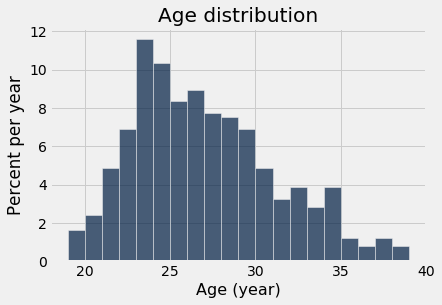

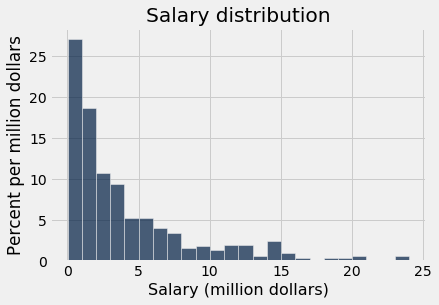

In [60]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')/1000000
    t1 = t.drop('Salary').with_column('Salary', salaries)
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins, unit='year')
    plt.title('Age distribution')
    t1.hist('Salary', bins=salary_bins, unit='million dollars')
    plt.title('Salary distribution') 
    
histograms(full_data)
print('Two histograms should be displayed below')

**Question 1**. Create a function called `compute_statistics` that takes a table containing ages and salaries and:
- Draws a histogram of ages
- Draws a histogram of salaries
- Returns a two-element array containing the average age and average salary (in that order)

You can call the `histograms` function to draw the histograms! 

*Note:* More charts will be displayed when running the test cell. Please feel free to ignore the charts.

array([2.65365854e+01, 4.26977577e+06])

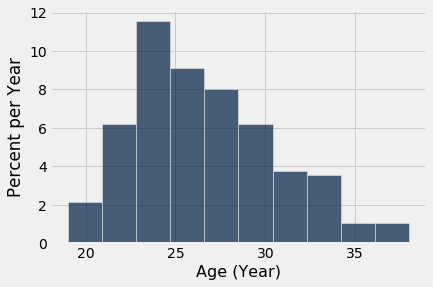

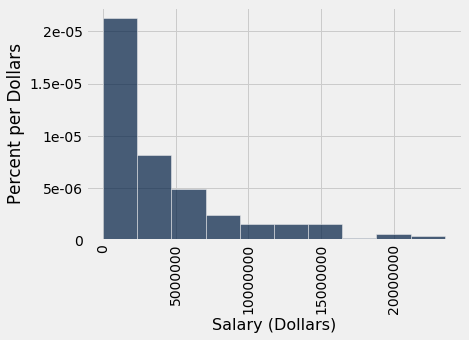

In [61]:
def compute_statistics(age_and_salary_data):
    age = age_and_salary_data.select('Age')[0]
    salary = age_and_salary_data.select('Salary')[0]
    age_hist= age_and_salary_data.hist('Age', unit = 'Year')
    salary_hist = age_and_salary_data.hist('Salary', unit = 'Dollars')
    return make_array(sum(age)/len(age), sum(salary)/len(salary))
    

full_stats = compute_statistics(full_data)
full_stats

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



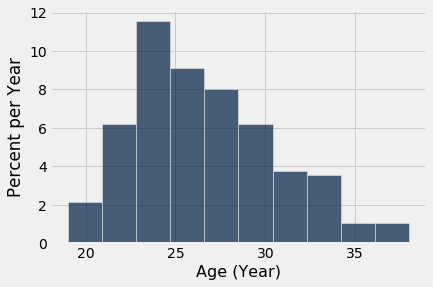

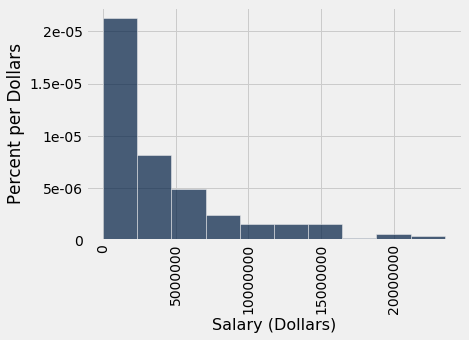

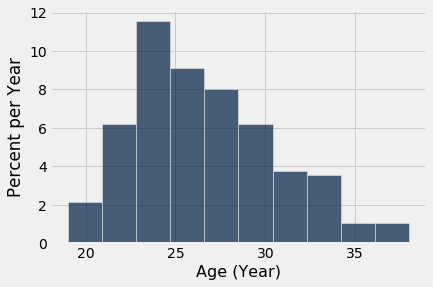

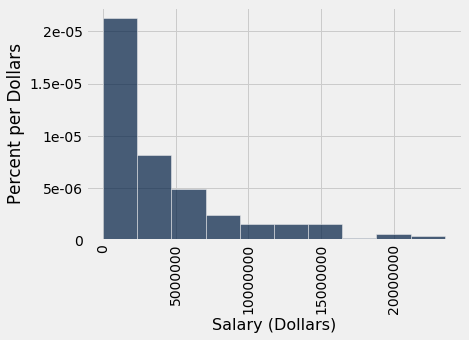

In [62]:
_ = ok.grade('q3_1') # Warning: Charts will be displayed while running this test

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team who are near your house, since it's easier to survey them.  This is called, somewhat pejoratively, *convenience sampling*.

Suppose you survey only *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

**Question 2.**  Assign `convenience_sample_data` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [63]:
convenience_sample = full_data.where('Age', are.below(22))
convenience_sample

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Alex Len,3649920,21,PHO,69,454,32,34,105,74,432
Andre Drummond,2568360,21,DET,82,1104,55,73,153,120,1130
Andrew Wiggins,5510640,19,MIN,82,374,170,86,50,177,1387
Anthony Bennett,5563920,21,MIN,57,216,48,27,16,36,298
Anthony Davis,5607240,21,NOP,68,696,149,100,200,95,1656
Archie Goodwin,1112280,20,PHO,41,74,44,18,9,48,231
Ben McLemore,3026280,21,SAC,82,241,140,77,19,138,996
Bradley Beal,4505280,21,WAS,63,241,194,76,18,123,962
Bruno Caboclo,1458360,19,TOR,8,2,0,0,1,4,10


In [64]:
_ = ok.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Assign `convenience_stats` to an array of the average age and average salary of your convenience sample, using the `compute_statistics` function.  Since they're computed on a sample, these are called *sample averages*. 

array([2.03636364e+01, 2.38353382e+06])

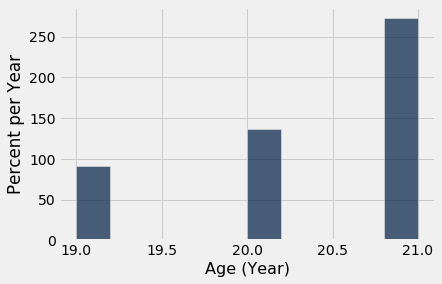

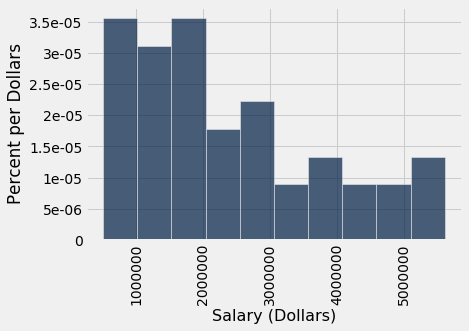

In [65]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

In [66]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. To do that, we'll need to use the `bin_column` option of the `hist` method, which indicates that all columns are counts of the bins in a particular column. The following cell does not require any changes; **just run it**.

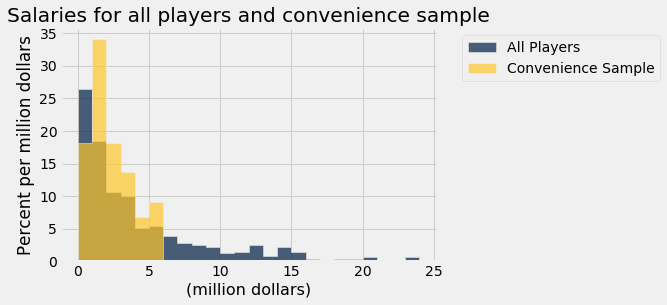

In [67]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    first_salary_in_millions = first.column('Salary')/1000000
    second_salary_in_millions = second.column('Salary')/1000000
    first_tbl_millions = first.drop('Salary').with_column('Salary', first_salary_in_millions)
    second_tbl_millions = second.drop('Salary').with_column('Salary', second_salary_in_millions)
    max_salary = max(np.append(first_tbl_millions.column('Salary'), second_tbl_millions.column('Salary')))
    bins = np.arange(0, max_salary+1, 1)
    first_binned = first_tbl_millions.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second_tbl_millions.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(bin_column='bin', unit='million dollars')
    plt.title('Salaries for all players and convenience sample')

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

**Question 4.** Does the convenience sample give us an accurate picture of the salary of the full population? Would you expect it to, in general?  Before you move on, write a short answer in English below.  You can refer to the statistics calculated above or perform your own analysis.

The convenience sample does not give us an accurate picture of the salary of the full population and I would not expect it to. Younger players in the NBA are often paid less and always within a smaller range than the more advanced players. Looking at the histogram above, the younger players are paid at most 6 million dollars and have a range from 0-6 million. The players as a whole, however, have a much larger range and this makes sense because the longer the players play, the more likely that they will improve, are able to secure sponsorships from companies, achieve fame, and secure a higher salary.

### Simple random sampling
A more justifiable approach is to sample uniformly at random from the players.  In a **simple random sample (SRS) without replacement**, we ensure that each player is selected at most once. Imagine writing down each player's name on a card, putting the cards in an box, and shuffling the box.  Then, pull out cards one by one and set them aside, stopping when the specified sample size is reached.

### Producing simple random samples
Sometimes, it’s useful to take random samples even when we have the data for the whole population. It helps us understand sampling accuracy.

### `sample`

The table method `sample` produces a random sample from the table. By default, it draws at random *with replacement* from the rows of a table. It takes in the sample size as its argument and returns a *table* with only the rows that were selected. The optional argument `with_replacement=False` specifies that the sample should be drawn without replacement.

Run the cell below to see an example call.

In [68]:
# Just run this cell

salary_data.sample(5, with_replacement=False)

PlayerName,Salary
Nick Collison,2242003
Ricky Ledo,816482
Malcolm Lee,915243
Dante Cunningham,831942
Darius Morris,702756


**Question 5.** Produce a simple random sample of size 44 from `full_data`. Run your analysis on it again.  Run the cell a few times to see how the histograms and statistics change across different samples.

- How much does the average age change across samples? 
- What about average salary?

array([2.70227273e+01, 3.80680300e+06])

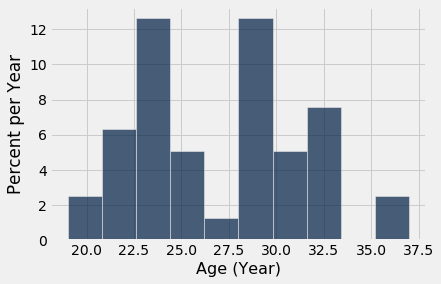

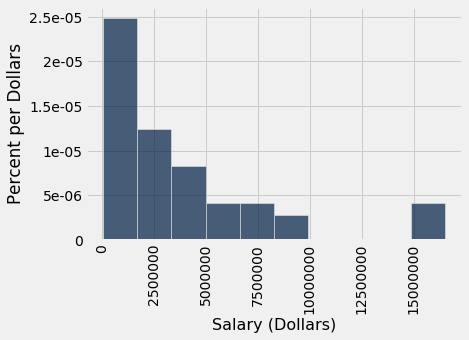

In [69]:
my_small_srswor_data = full_data.sample(44, with_replacement=False)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

*Write your answer here, replacing this text.*

**Question 6.** As in the previous question, analyze several simple random samples of size 100 from `full_data`.  
- Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?  
- Are the sample averages and histograms closer to their true values/shape for age or for salary?  What did you expect to see?

array([2.65500000e+01, 5.09011885e+06])

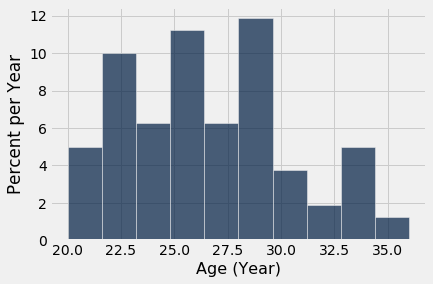

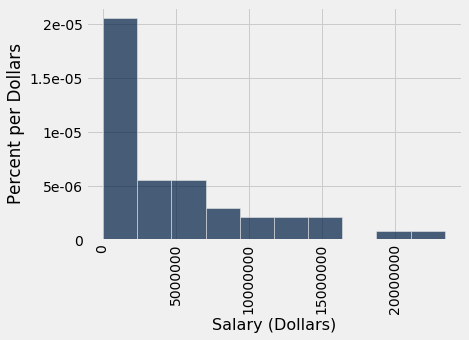

In [70]:
my_large_srswor_data = full_data.sample(100, with_replacement=False)
my_large_stats = compute_statistics(my_large_srswor_data)
my_large_stats

The histogram shapes do change more compared to the original based on the sample size of 44 as opposed to the sample size of 100; the larger the sample size, the closer it is the the full data statistics. With the 100 sample size, the averages are close to their true values and the histogram for salary is closer to the true shape as well. I expected this outcome because a larger sample size means a more likely chance of equal representation for the population

Congratulations, you're done with Lab 5!  Be sure to 
- **Run all the tests** (the next cell has a shortcut for that). 
- **Save and Checkpoint** from the `File` menu.
- **Run the cell below to submit your work**.
- And ask one of the staff members to check you off.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

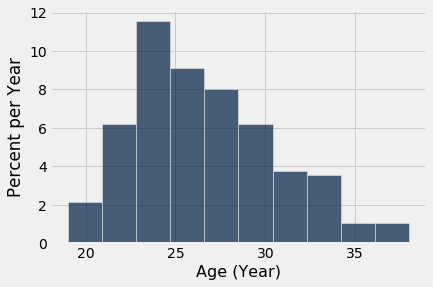

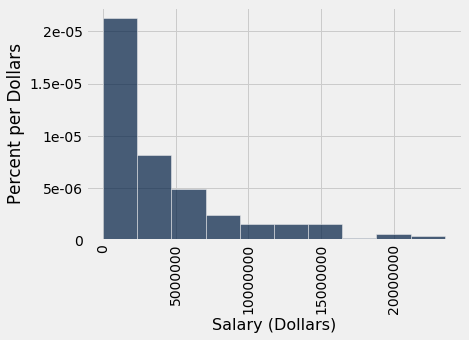

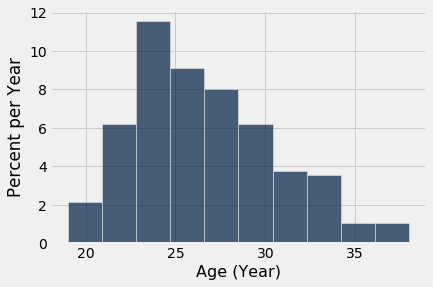

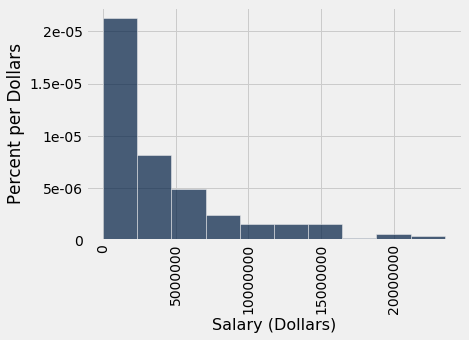

In [71]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

In [72]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab05.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: mingxiuhui@berkeley.edu

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://okpy.org/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: cCKr4AjMUvSBpxwP9j0yr882rhRlrw
Successfully logged in as mingxiuhui@berkeley.edu
Submit... 100% complete
Submission successful for user: mingxiuhui@berkeley.edu
URL: https://okpy.org/cal/data8/sp19/lab05/submissions/K1LJPx

